<a href="https://colab.research.google.com/github/garfield-gray/DataMining/blob/main/Clustering_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#Theoretical

##Question 1

In [2]:
data = {
    'X': [3, 2.5, 2.5, 3, 3.5, 3.5, 4.5, 4, 4, 4],
    'Y': [1.3, 1, 1.5, 3, 3, 2.5, 2, 1.5, 3.5, 2]
}

df1 = pd.DataFrame(data)

print(df1)

     X    Y
0  3.0  1.3
1  2.5  1.0
2  2.5  1.5
3  3.0  3.0
4  3.5  3.0
5  3.5  2.5
6  4.5  2.0
7  4.0  1.5
8  4.0  3.5
9  4.0  2.0


In [3]:
from scipy.spatial.distance import pdist, squareform
manhattan_distances = pdist(df1, metric='cityblock')
manhattan_matrix = squareform(manhattan_distances)

manhattan_df = pd.DataFrame(manhattan_matrix, index=df1.index, columns=df1.index)

manhattan_df

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.8,0.7,1.7,2.2,1.7,2.2,1.2,3.2,1.7
1,0.8,0.0,0.5,2.5,3.0,2.5,3.0,2.0,4.0,2.5
2,0.7,0.5,0.0,2.0,2.5,2.0,2.5,1.5,3.5,2.0
3,1.7,2.5,2.0,0.0,0.5,1.0,2.5,2.5,1.5,2.0
4,2.2,3.0,2.5,0.5,0.0,0.5,2.0,2.0,1.0,1.5
5,1.7,2.5,2.0,1.0,0.5,0.0,1.5,1.5,1.5,1.0
6,2.2,3.0,2.5,2.5,2.0,1.5,0.0,1.0,2.0,0.5
7,1.2,2.0,1.5,2.5,2.0,1.5,1.0,0.0,2.0,0.5
8,3.2,4.0,3.5,1.5,1.0,1.5,2.0,2.0,0.0,1.5
9,1.7,2.5,2.0,2.0,1.5,1.0,0.5,0.5,1.5,0.0


In [4]:
from sklearn.cluster import DBSCAN

# Define the DBSCAN parameters
params = [
    {'eps': 0.6, 'min_samples': 3},
    {'eps': 0.9, 'min_samples': 3},
    {'eps': 1.2, 'min_samples': 3}
]


# Print the resulting clusters for each parameter set
for param in params:
    dbscan = DBSCAN(eps=param['eps'], min_samples=param['min_samples'], metric='manhattan')
    df1['cluster'] = dbscan.fit_predict(df1)
    print(f"DBSCAN with eps={param['eps']}, min_samples={param['min_samples']}")
    print(df1[['X', 'Y', 'cluster']])
    print()


DBSCAN with eps=0.6, min_samples=3
     X    Y  cluster
0  3.0  1.3       -1
1  2.5  1.0       -1
2  2.5  1.5       -1
3  3.0  3.0        0
4  3.5  3.0        0
5  3.5  2.5        0
6  4.5  2.0        1
7  4.0  1.5        1
8  4.0  3.5       -1
9  4.0  2.0        1

DBSCAN with eps=0.9, min_samples=3
     X    Y  cluster
0  3.0  1.3        0
1  2.5  1.0        0
2  2.5  1.5        0
3  3.0  3.0        1
4  3.5  3.0        1
5  3.5  2.5        1
6  4.5  2.0        2
7  4.0  1.5        2
8  4.0  3.5       -1
9  4.0  2.0        2

DBSCAN with eps=1.2, min_samples=3
     X    Y  cluster
0  3.0  1.3        0
1  2.5  1.0        0
2  2.5  1.5        0
3  3.0  3.0        1
4  3.5  3.0        1
5  3.5  2.5        1
6  4.5  2.0        2
7  4.0  1.5        2
8  4.0  3.5       -1
9  4.0  2.0        2



In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Calculate the pairwise Manhattan distances
manhattan_distances = pairwise_distances(df1, metric='manhattan')

# Use Multidimensional Scaling (MDS) to project the data into Euclidean space
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
transformed_data = mds.fit_transform(manhattan_distances)

# Perform KMeans clustering on the transformed data
initial_centers = np.array([[3.5, 2.5], [4, 1.5], [4, 2]])  # Initial centers projected into the transformed space
kmeans = KMeans(n_clusters=3, init=initial_centers, n_init=1, random_state=42)
kmeans.fit(transformed_data)

# Print the resulting clusters
df1['cluster'] = kmeans.labels_
print(df1)


     X    Y  cluster
0  3.0  1.3        1
1  2.5  1.0        1
2  2.5  1.5        1
3  3.0  3.0        1
4  3.5  3.0        1
5  3.5  2.5        1
6  4.5  2.0        0
7  4.0  1.5        0
8  4.0  3.5        2
9  4.0  2.0        0


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<ipython-input-149-0579181d0973>:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = linkage(manhattan_distances, method='single')
<ipython-input-149-0579181d0973>:23: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_complete = linkage(manhattan_distances, method='complete')


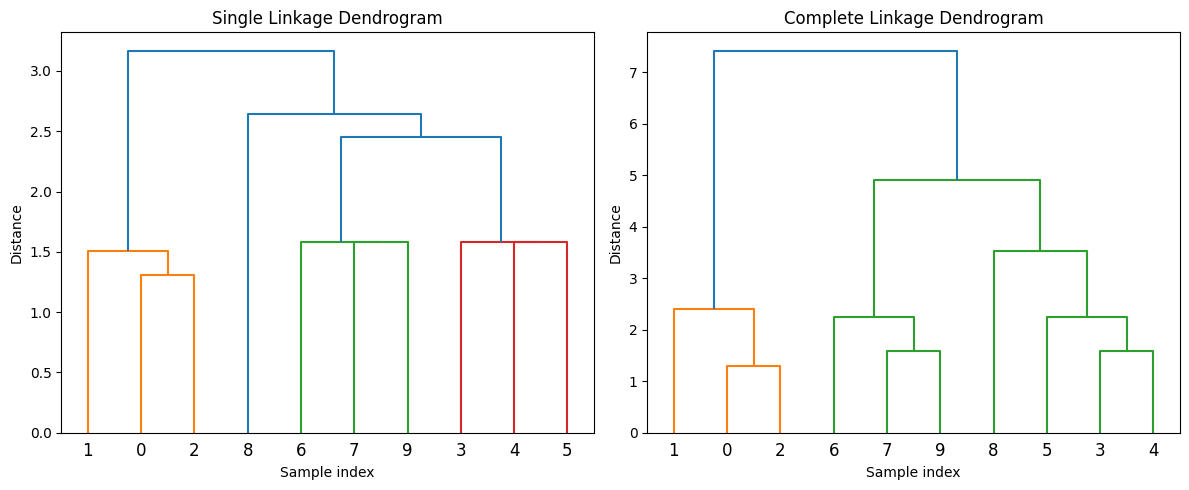

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Define the dataset
data = {
    'X': [3, 2.5, 2.5, 3, 3.5, 3.5, 4.5, 4, 4, 4],
    'Y': [1.3, 1, 1.5, 3, 3, 2.5, 2, 1.5, 3.5, 2]
}

df1 = pd.DataFrame(data)

# Calculate the pairwise Manhattan distances
manhattan_distances = pairwise_distances(df1, metric='manhattan')

# Perform hierarchical/agglomerative clustering
# Single-link method
Z_single = linkage(manhattan_distances, method='single')

# Complete-link method
Z_complete = linkage(manhattan_distances, method='complete')

# Plot the dendrograms
plt.figure(figsize=(12, 5))

# Single-link dendrogram
plt.subplot(1, 2, 1)
dendrogram(Z_single, labels=df1.index.tolist())
plt.title('Single Linkage Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Complete-link dendrogram
plt.subplot(1, 2, 2)
dendrogram(Z_complete, labels=df1.index.tolist())
plt.title('Complete Linkage Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


##Question 2

In [ ]:
import pandas as pd

# Construct the confusion matrix
data = {
    'Impulse Buyers': [30, 10, 5],
    'Discount Seekers': [10, 20, 15],
    'Loyal Customers': [5, 15, 25],
    'Infrequent Shoppers': [5, 5, 5]
}
confusion_matrix = pd.DataFrame(data, index=['Cluster1', 'Cluster2', 'Cluster3'])



In [ ]:
confusion_matrix

,Impulse Buyers,Discount Seekers,Loyal Customers,Infrequent Shoppers
Cluster1,30,10,5,5
Cluster2,10,20,15,5
Cluster3,5,15,25,5


###A

In [ ]:
import numpy as np
from scipy.stats import entropy

# Define the counts of each cluster for each group
cluster_counts = np.array([[30, 10, 5],    # Impulse Buyers
                            [10, 20, 15],  # Discount Seekers
                            [5, 15, 25],   # Loyal Customers
                            [5, 5, 5]])   # Infrequent Shoppers

# Compute the total count of each cluster
cluster_totals = np.sum(cluster_counts, axis=1)

# Compute the probability of each cluster
cluster_probabilities = cluster_counts / cluster_totals[:, None]

# Compute the entropy of "G" given each cluster
conditional_entropies = [entropy(cluster_probs, base=2) for cluster_probs in cluster_probabilities]

# Print the conditional entropy of "G" given each cluster
for idx, entropy_value in enumerate(conditional_entropies):
    print(f'Conditional Entropy of G given Cluster{idx + 1}: {entropy_value:.2f} bits')


Conditional Entropy of G given Cluster1: 1.22 bits
Conditional Entropy of G given Cluster2: 1.53 bits
Conditional Entropy of G given Cluster3: 1.35 bits
Conditional Entropy of G given Cluster4: 1.58 bits


###B

In [ ]:
import numpy as np
import pandas as pd

# Define the confusion matrix
confusion_matrix = np.array([
    [30, 10, 5],
    [10, 20, 15],
    [5, 15, 25],
    [5, 5, 5]
])

# Convert to DataFrame for better readability
df_confusion_matrix = pd.DataFrame(confusion_matrix, columns=['Cluster1', 'Cluster2', 'Cluster3'],
                                   index=['Impulse Buyers', 'Discount Seekers', 'Loyal Customers', 'Infrequent Shoppers'])

df_confusion_matrix


,Cluster1,Cluster2,Cluster3
Impulse Buyers,30,10,5
Discount Seekers,10,20,15
Loyal Customers,5,15,25
Infrequent Shoppers,5,5,5


In [ ]:
def calculate_conditional_entropy(confusion_matrix):
    # Sum of elements in each cluster (column sums)
    cluster_totals = confusion_matrix.sum(axis=0)
    total_samples = cluster_totals.sum()

    # Conditional probabilities P(g|c)
    P_gc = confusion_matrix / cluster_totals

    # Replace NaNs resulting from division by zero with zero
    P_gc = np.nan_to_num(P_gc)

    # Calculate conditional entropy H(G|C)
    H_G_given_C = -np.sum(P_gc * np.log2(P_gc + np.finfo(float).eps), axis=0)
    P_c = cluster_totals / total_samples
    conditional_entropy = np.sum(P_c * H_G_given_C)

    return conditional_entropy

conditional_entropy = calculate_conditional_entropy(confusion_matrix)
print(f"Conditional Entropy H(G|C): {conditional_entropy}")


Conditional Entropy H(G|C): 1.7009550787843382


###C

In [ ]:
import numpy as np
import pandas as pd

# Define the confusion matrix
confusion_matrix = np.array([
    [30, 10, 5],
    [10, 20, 15],
    [5, 15, 25],
    [5, 5, 5]
])

# Convert to DataFrame for better readability
df_confusion_matrix = pd.DataFrame(confusion_matrix, columns=['Cluster1', 'Cluster2', 'Cluster3'],
                                   index=['Impulse Buyers', 'Discount Seekers', 'Loyal Customers', 'Infrequent Shoppers'])

# Calculate the total number of samples
total_samples = confusion_matrix.sum()

# Calculate joint probability P(g, c)
joint_prob = confusion_matrix / total_samples

# Calculate marginal probabilities P(g) and P(c)
P_g = confusion_matrix.sum(axis=1) / total_samples
P_c = confusion_matrix.sum(axis=0) / total_samples

# Calculate mutual information I(G; C)
mutual_info = 0
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        if joint_prob[i, j] > 0:
            mutual_info += joint_prob[i, j] * np.log2(joint_prob[i, j] / (P_g[i] * P_c[j]))

print(f"Mutual Information I(G; C): {mutual_info}")


Mutual Information I(G; C): 0.1945067654539825


###D

In [ ]:
import numpy as np
import pandas as pd

# Define the confusion matrix
confusion_matrix = np.array([
    [30, 10, 5],
    [10, 20, 15],
    [5, 15, 25],
    [5, 5, 5]
])

# Convert to DataFrame for better readability
df_confusion_matrix = pd.DataFrame(confusion_matrix, columns=['Cluster1', 'Cluster2', 'Cluster3'],
                                   index=['Impulse Buyers', 'Discount Seekers', 'Loyal Customers', 'Infrequent Shoppers'])

# Calculate the total number of samples
total_samples = confusion_matrix.sum()

# Calculate purity
max_in_clusters = confusion_matrix.max(axis=0)  # Most frequent class in each cluster
purity = max_in_clusters.sum() / total_samples

print(f"Purity: {purity}")


Purity: 0.5


#Imperical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Address of files
%cd /content/drive/MyDrive/Uni/Data/DataMining/Winter2024/CA#5
!ls

/content/drive/MyDrive/Uni/Data/DataMining/Winter2024/CA#5
 CA5.pdf   Clustering_Methods.ipynb  'Copy of CA#5Report.docx'	 data.csv


##Play with Data

###A

In [ ]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CLIENT_ID                        8950 non-null   object 
 1   ACCOUNT_BALANCE                  8950 non-null   float64
 2   BALANCE_UPDATE_FREQUENCY         8950 non-null   float64
 3   TOTAL_PURCHASES                  8950 non-null   float64
 4   SINGLE_PURCHASE_AMOUNT           8950 non-null   float64
 5   INSTALLMENT_PURCHASES_AMOUNT     8950 non-null   float64
 6   ADVANCE_CASH_AMOUNT              8950 non-null   float64
 7   PURCHASES_UPDATE_FREQUENCY       8950 non-null   float64
 8   SINGLE_PURCHASE_FREQUENCY        8950 non-null   float64
 9   INSTALLMENT_PURCHASES_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY           8950 non-null   float64
 11  CASH_ADVANCE_TRANSACTIONS        8950 non-null   int64  
 12  PURCHASES_TRANSACTIO

In [ ]:
df.describe()

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


###B

In [ ]:
df.drop('CLIENT_ID', axis=1, inplace = True)

In [ ]:
# Create an empty list to store data
data = []

# Loop to generate numbers and their squares
for i in df.columns:  # Example loop for numbers from 1 to 10
  if df[i].skew() > 1:
    data.append([i, df[i].skew(), np.sqrt(df[i]).skew(), np.log1p(df[i]).skew()])  # Append to the list
  # print(i)
# Create DataFrame from the list
dfskew = pd.DataFrame(data, columns=['Column', 'Skewness', 'sqrt', 'logp'])

print(dfskew)
dfskew['sqrt']>dfskew['logp']

                          Column   Skewness      sqrt      logp
0                ACCOUNT_BALANCE   2.393386  0.829498 -0.861021
1                TOTAL_PURCHASES   8.144269  1.730752 -0.764492
2         SINGLE_PURCHASE_AMOUNT  10.045083  2.129460  0.185854
3   INSTALLMENT_PURCHASES_AMOUNT   7.299120  1.546939 -0.024981
4            ADVANCE_CASH_AMOUNT   5.166609  1.486159  0.262594
5      SINGLE_PURCHASE_FREQUENCY   1.535613  0.724607  1.290617
6         CASH_ADVANCE_FREQUENCY   1.828686  0.706976  1.455462
7      CASH_ADVANCE_TRANSACTIONS   5.721298  1.417779  0.940131
8    PURCHASES_TRANSACTION_COUNT   4.630655  1.185757  0.032697
9                 CREDIT_MAXIMUM   1.522464  0.680964 -0.101438
10                   AMOUNT_PAID   5.907620  1.951535 -1.778312
11        MINIMUM_PAYMENT_AMOUNT  13.622797  3.795035  0.249933
12       FULL_PAYMENT_PERCENTAGE   1.942820  1.297280  1.746046


0      True
1      True
2      True
3      True
4      True
5     False
6     False
7      True
8      True
9      True
10     True
11     True
12    False
dtype: bool

In [ ]:
columns = df.select_dtypes(include=[np.number]).columns

# Apply log transformation to skewed numerical columns
skewed_columns = []
for col in columns:
    skewness = df[col].skew()
    print(col, skewness)
    if skewness > 1:  # You can adjust this threshold based on your skewness criteria
        skewed_columns.append(col)
        # df[col] = np.log1p(df[col])  # log1p is used to handle zero values

# If you want to see which columns were log-transformed
print("Skewed Columns Transformed:", skewed_columns)

ACCOUNT_BALANCE 2.393386042571806
BALANCE_UPDATE_FREQUENCY -2.0232655185149078
TOTAL_PURCHASES 8.144269064554651
SINGLE_PURCHASE_AMOUNT 10.045082884700278
INSTALLMENT_PURCHASES_AMOUNT 7.299119908745641
ADVANCE_CASH_AMOUNT 5.166609074074723
PURCHASES_UPDATE_FREQUENCY 0.06016423585803591
SINGLE_PURCHASE_FREQUENCY 1.5356127835248519
INSTALLMENT_PURCHASES_FREQUENCY 0.5092011649999882
CASH_ADVANCE_FREQUENCY 1.828686266477852
CASH_ADVANCE_TRANSACTIONS 5.721298203192298
PURCHASES_TRANSACTION_COUNT 4.630655265932403
CREDIT_MAXIMUM 1.5224640052886198
AMOUNT_PAID 5.907619794397562
MINIMUM_PAYMENT_AMOUNT 13.622796994677456
FULL_PAYMENT_PERCENTAGE 1.942819940971858
CREDIT_CARD_TENURE -2.9430172876199134
Skewed Columns Transformed: ['ACCOUNT_BALANCE', 'TOTAL_PURCHASES', 'SINGLE_PURCHASE_AMOUNT', 'INSTALLMENT_PURCHASES_AMOUNT', 'ADVANCE_CASH_AMOUNT', 'SINGLE_PURCHASE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRANSACTIONS', 'PURCHASES_TRANSACTION_COUNT', 'CREDIT_MAXIMUM', 'AMOUNT_PAID', 'MI

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers_list = []
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_list.append(col_outliers)
    # Concatenate all the outliers into a single DataFrame and drop duplicates
    outliers = pd.concat(outliers_list).drop_duplicates()
    return outliers

# Detect outliers in the credit card data
outliers = detect_outliers_iqr(df)
print(outliers)

      ACCOUNT_BALANCE  BALANCE_UPDATE_FREQUENCY  TOTAL_PURCHASES  \
15        6886.213231                  1.000000          1611.70   
21        6369.531318                  1.000000          6359.95   
24        5368.571219                  1.000000             0.00   
28        7152.864372                  1.000000           387.05   
30       12136.219960                  1.000000          3038.01   
...               ...                       ...              ...   
8942        40.829749                  1.000000           113.28   
8944       193.571722                  0.833333          1012.73   
8946        19.183215                  1.000000           300.00   
8947        23.398673                  0.833333           144.40   
8948        13.457564                  0.833333             0.00   

      SINGLE_PURCHASE_AMOUNT  INSTALLMENT_PURCHASES_AMOUNT  \
15                      0.00                       1611.70   
21                   5910.04                        449.91 

In [ ]:
outliers

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.00,12
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.00,12
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.00,11
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.00,12
30,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6


In [ ]:
# Function to detect outliers using Z-Score
def detect_outliers_zscore(df, threshold=3):
    from scipy.stats import zscore

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    z_scores = df[numeric_cols].apply(zscore)
    outliers = df[(np.abs(z_scores) > threshold).any(axis=1)]
    return outliers

# Detect outliers in the credit card data
outliers = detect_outliers_zscore(df)
outliers

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.00,12
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.00,12
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.00,12
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.00,12
30,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


###C

In [ ]:
#overview

df_overview = []
# columns = df . columns . drop("CLIENT_ID")
for i in columns :
    types = df[i] . dtypes
    unique_data = df[i] . nunique()

    missing_count=df[i].isnull().sum()
    value_count= df[i].isnull().count()
    missing_percentage= round(missing_count/value_count*100,2)

    duplicated= df.duplicated().sum()
    df_overview . append ([i , types , unique_data , missing_count, missing_percentage,duplicated])

df_info = pd . DataFrame (df_overview)
df_info . columns =['name of column' , 'types' ,'unique_data' , 'missing value', "missing percentage","duplicated"]




df_info.style.highlight_max(color = 'green', axis = 0)

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,ACCOUNT_BALANCE,float64,8871,0,0.000000,0
1,BALANCE_UPDATE_FREQUENCY,float64,43,0,0.000000,0
2,TOTAL_PURCHASES,float64,6203,0,0.000000,0
3,SINGLE_PURCHASE_AMOUNT,float64,4014,0,0.000000,0
4,INSTALLMENT_PURCHASES_AMOUNT,float64,4452,0,0.000000,0
5,ADVANCE_CASH_AMOUNT,float64,4323,0,0.000000,0
6,PURCHASES_UPDATE_FREQUENCY,float64,47,0,0.000000,0
7,SINGLE_PURCHASE_FREQUENCY,float64,47,0,0.000000,0
8,INSTALLMENT_PURCHASES_FREQUENCY,float64,47,0,0.000000,0
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000,0


In [ ]:
# Check for duplicate rows in the entire DataFrame
duplicates = df.duplicated()

print("Duplicate rows in the DataFrame:")
print(duplicates)

# Get the indices of duplicate rows
duplicate_indices = duplicates[duplicates].index.tolist()
print("Indices of duplicate rows:", duplicate_indices)

Duplicate rows in the DataFrame:
0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool
Indices of duplicate rows: []


###D

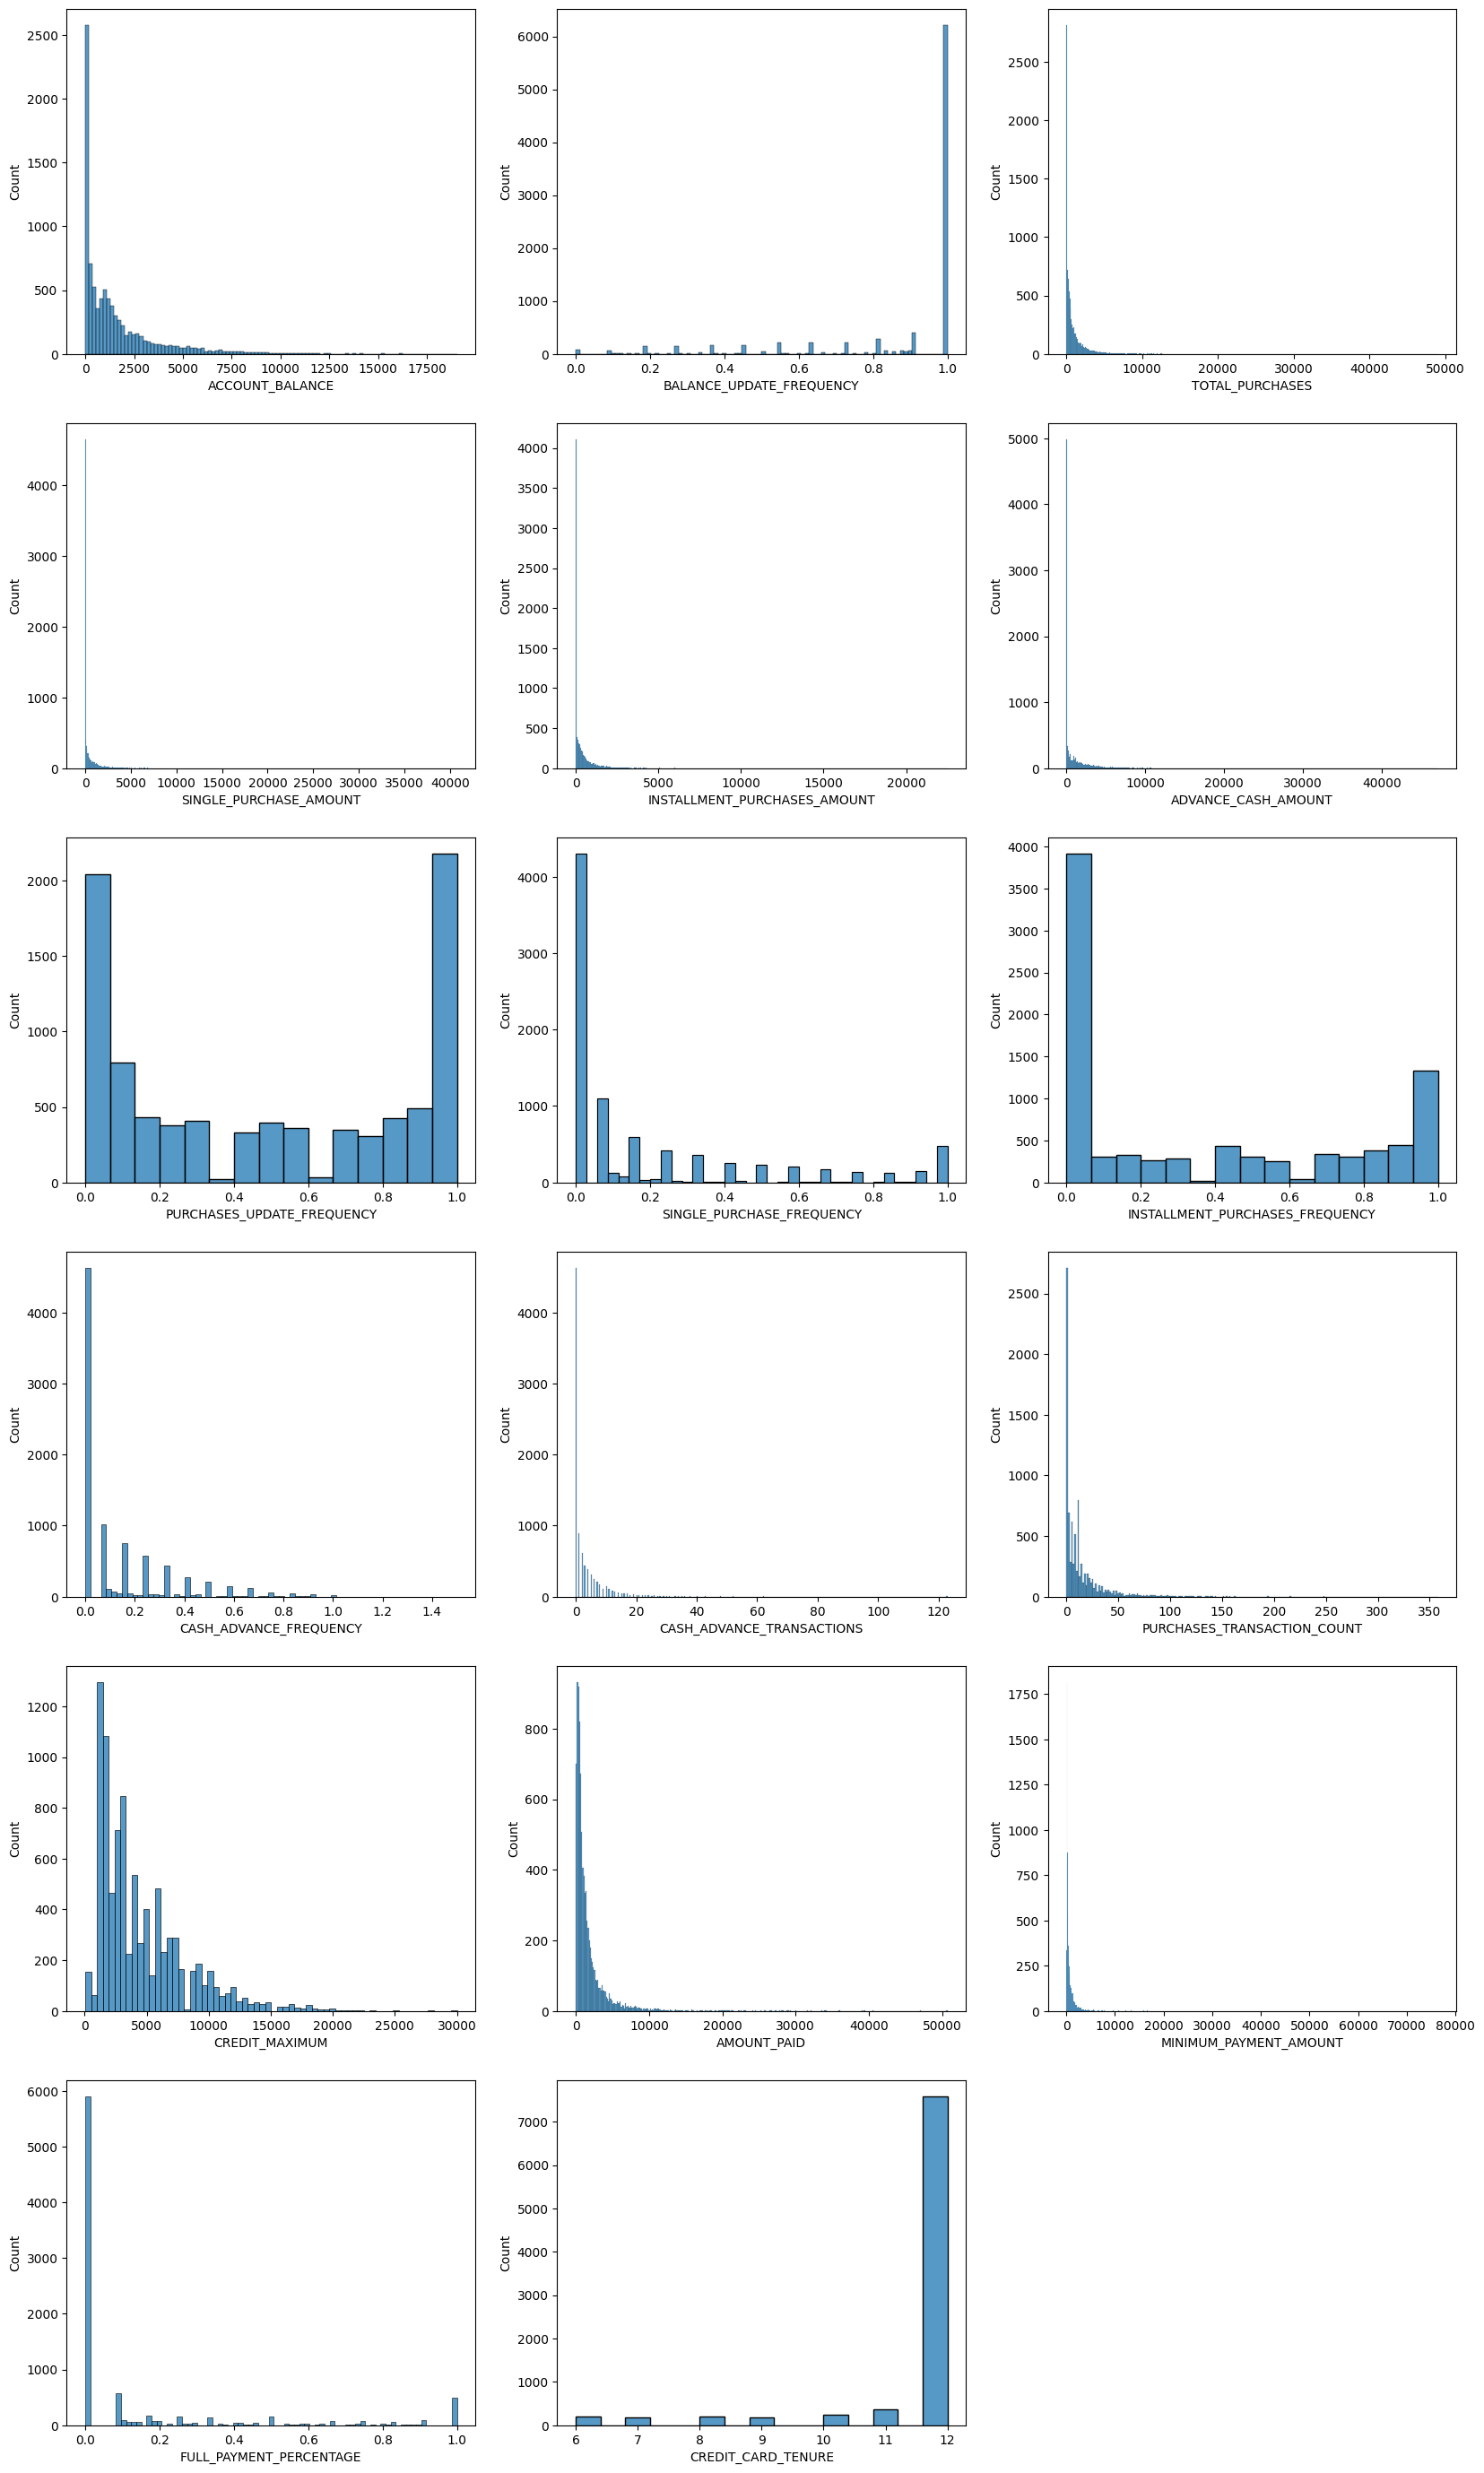

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot(df[col] , ax=ax)
        plt.xlabel(col)

plt.show()

###E

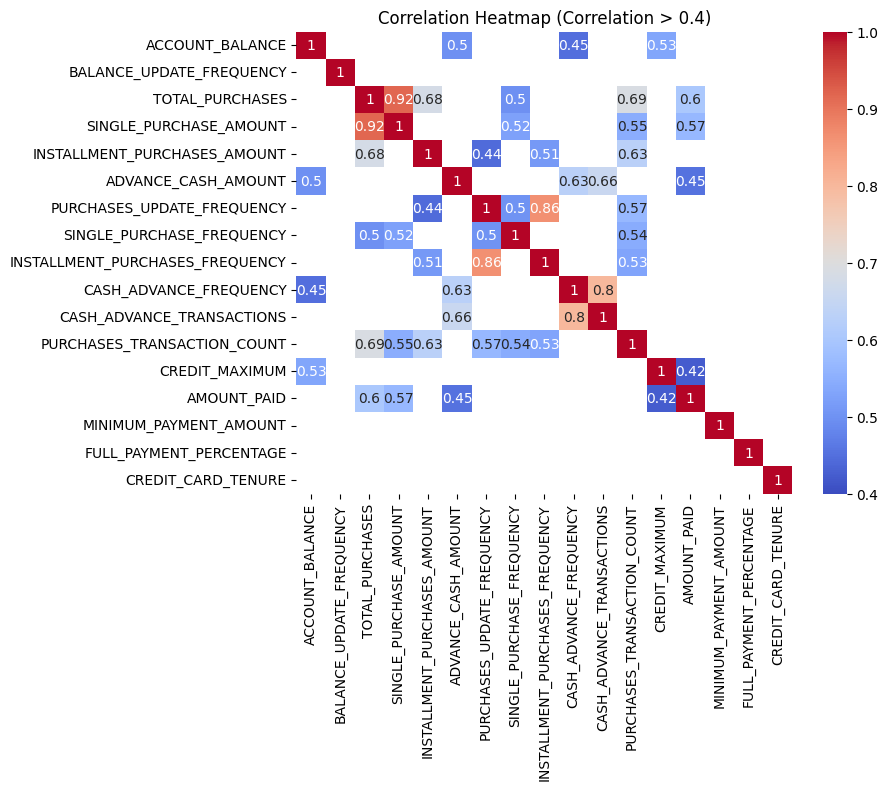

In [ ]:
correlation_matrix = df.corr()

# Filter correlation matrix for values greater than 0.4
high_corr_matrix = correlation_matrix[np.abs(correlation_matrix) > 0.4]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', vmin=0.4, vmax=1.0)
plt.title('Correlation Heatmap (Correlation > 0.4)')
plt.show()

##Preprpcessing

###A

In [ ]:
df.dropna(inplace=True)

In [ ]:
columns = df.select_dtypes(include=[np.number]).columns

# Apply log transformation to skewed numerical columns
skewed_columns = []
for col in columns:
    skewness = df[col].skew()
    # print(col, skewness)
    if skewness > 1:  # You can adjust this threshold based on your skewness criteria
        skewed_columns.append(col)
        df[col] = np.log1p(df[col])  # log1p is used to handle zero values


In [ ]:
# Detect outliers in the credit card data
outliers = detect_outliers_zscore(df)

In [ ]:
df = df.drop(outliers.index)

###B

In [ ]:
df.isnull().sum()

ACCOUNT_BALANCE                    0
BALANCE_UPDATE_FREQUENCY           0
TOTAL_PURCHASES                    0
SINGLE_PURCHASE_AMOUNT             0
INSTALLMENT_PURCHASES_AMOUNT       0
ADVANCE_CASH_AMOUNT                0
PURCHASES_UPDATE_FREQUENCY         0
SINGLE_PURCHASE_FREQUENCY          0
INSTALLMENT_PURCHASES_FREQUENCY    0
CASH_ADVANCE_FREQUENCY             0
CASH_ADVANCE_TRANSACTIONS          0
PURCHASES_TRANSACTION_COUNT        0
CREDIT_MAXIMUM                     0
AMOUNT_PAID                        0
MINIMUM_PAYMENT_AMOUNT             0
FULL_PAYMENT_PERCENTAGE            0
CREDIT_CARD_TENURE                 0
dtype: int64

In [ ]:
# Create an empty list to store data
data = []

# Loop to generate numbers and their squares
for i in df.columns:  # Example loop for numbers from 1 to 10
  if df[i].skew() > 1:
    data.append([i, df[i].skew(), np.sqrt(df[i]).skew(), np.log1p(df[i]).skew()])  # Append to the list
  # print(i)
# Create DataFrame from the list
dfskew = pd.DataFrame(data, columns=['Column', 'Skewness', 'sqrt', 'logp'])

dfskew

,Column,Skewness,sqrt,logp
0,SINGLE_PURCHASE_FREQUENCY,1.210225,0.501654,1.038385
1,CASH_ADVANCE_FREQUENCY,1.289639,0.530726,1.115417
2,FULL_PAYMENT_PERCENTAGE,1.686096,1.101640,1.544270


In [ ]:
outliers2 = detect_outliers_zscore(df)
outliers2

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
16,7.636788,0.875000,0.000000,0.000000,0.000000,7.932102,0.000000,0.000000,0.000,0.223144,1.386294,0.000000,8.006701,5.973745,5.933781,0.000000,8
19,8.182831,1.000000,5.990564,0.000000,5.990564,0.000000,1.000000,0.000000,1.000,0.000000,0.000000,2.564949,8.294300,6.961278,9.430804,0.000000,12
36,8.913022,1.000000,0.000000,0.000000,0.000000,9.090923,0.000000,0.000000,0.000,0.546544,2.484907,0.000000,9.105091,7.400841,7.594806,0.000000,11
46,6.164256,0.500000,4.707185,0.000000,4.707185,6.922308,0.375000,0.000000,0.250,0.117783,0.693147,1.386294,7.438972,5.176223,4.998561,0.000000,8
53,6.143486,0.888889,7.590963,7.590963,0.000000,7.591996,0.666667,0.510826,0.000,0.105360,0.693147,2.484907,8.006701,8.042716,4.893698,0.182322,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,4.806432,0.750000,5.956511,5.956511,0.000000,5.139057,0.500000,0.405465,0.000,0.117783,1.386294,2.079442,6.216606,4.597393,4.744450,0.000000,8
8877,4.027986,0.875000,5.101755,0.000000,5.101755,0.000000,0.875000,0.000000,0.750,0.000000,0.000000,2.079442,6.908755,4.152912,4.705744,0.000000,8
8878,6.768870,0.750000,0.000000,0.000000,0.000000,7.051791,0.000000,0.000000,0.000,0.117783,1.386294,0.000000,7.090910,5.022268,5.825962,0.000000,8
8879,4.932637,1.000000,6.091310,0.000000,6.091310,0.000000,0.750000,0.000000,0.625,0.000000,0.000000,1.945910,6.908755,5.137266,4.833420,0.000000,8


In [ ]:
df = df.drop(outliers2.index)

In [ ]:
detect_outliers_zscore(df)

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
17,3.739798,0.454545,6.253829,0.000000,6.253829,0.000000,0.416667,0.000000,0.333333,0.000000,0.000000,2.197225,7.824446,5.543577,4.306808,0.223144,12
39,7.253189,0.454545,6.871340,6.871340,0.000000,8.728213,0.083333,0.080042,0.000000,0.287682,1.945910,1.945910,8.922792,9.907085,6.580568,0.287682,12
73,7.501067,1.000000,6.572143,6.222735,5.355737,0.000000,0.500000,0.095310,0.400000,0.000000,0.000000,2.197225,7.719130,6.791241,6.435762,0.000000,10
90,9.146575,1.000000,8.537206,7.046499,8.282291,5.918187,1.000000,0.223144,0.916667,0.080042,0.693147,3.850148,9.105091,8.765692,9.192995,0.000000,12
107,8.514670,1.000000,0.000000,0.000000,0.000000,8.601620,0.000000,0.000000,0.000000,0.459532,3.713572,0.000000,8.987322,7.124911,7.272559,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8808,5.957036,0.900000,6.059357,3.931826,5.935159,6.697757,0.900000,0.095310,0.800000,0.405465,1.945910,3.258097,6.908755,5.841005,5.814891,0.000000,10
8809,1.905307,0.900000,4.435923,0.000000,4.435923,0.000000,0.900000,0.000000,0.800000,0.000000,0.000000,2.302585,7.313887,4.376511,4.528625,0.318454,10
8810,3.376829,1.000000,5.980909,3.824284,5.860786,0.000000,1.000000,0.095310,0.900000,0.000000,0.000000,2.484907,6.908755,5.864387,4.979278,0.693147,10
8812,2.256503,0.400000,0.000000,0.000000,0.000000,4.048990,0.000000,0.000000,0.000000,0.095310,0.693147,0.000000,7.090910,5.011531,4.275794,0.405465,10


In [ ]:
df.describe()

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
count,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000
mean,6.467036,0.940267,5.082193,3.412154,3.544729,3.236422,0.523455,0.174319,0.391074,0.103490,0.780427,2.026321,8.138106,6.908869,6.013630,0.119624,11.901749
std,1.678993,0.135540,2.911696,3.271139,3.105242,3.511940,0.400696,0.225232,0.403439,0.138204,0.954625,1.387142,0.807019,1.047180,1.030713,0.210456,0.378419
min,1.054115,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.707110,3.616450,2.882220,0.000000,10.000000
25%,5.373888,1.000000,4.110874,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.693147,7.496097,6.183236,5.189656,0.000000,12.000000
50%,6.913675,1.000000,6.093637,4.214938,4.839847,0.000000,0.545455,0.080042,0.250000,0.000000,0.000000,2.302585,8.160804,6.901304,5.864286,0.000000,12.000000
75%,7.684770,1.000000,7.157525,6.520621,6.295303,6.898477,1.000000,0.287682,0.833333,0.154151,1.609438,3.044522,8.779711,7.613279,6.752692,0.154151,12.000000
max,9.825340,1.000000,10.351385,10.131570,10.021315,10.048964,1.000000,0.693147,1.000000,0.530628,3.713572,5.736572,10.308986,10.107663,9.192995,0.693147,12.000000


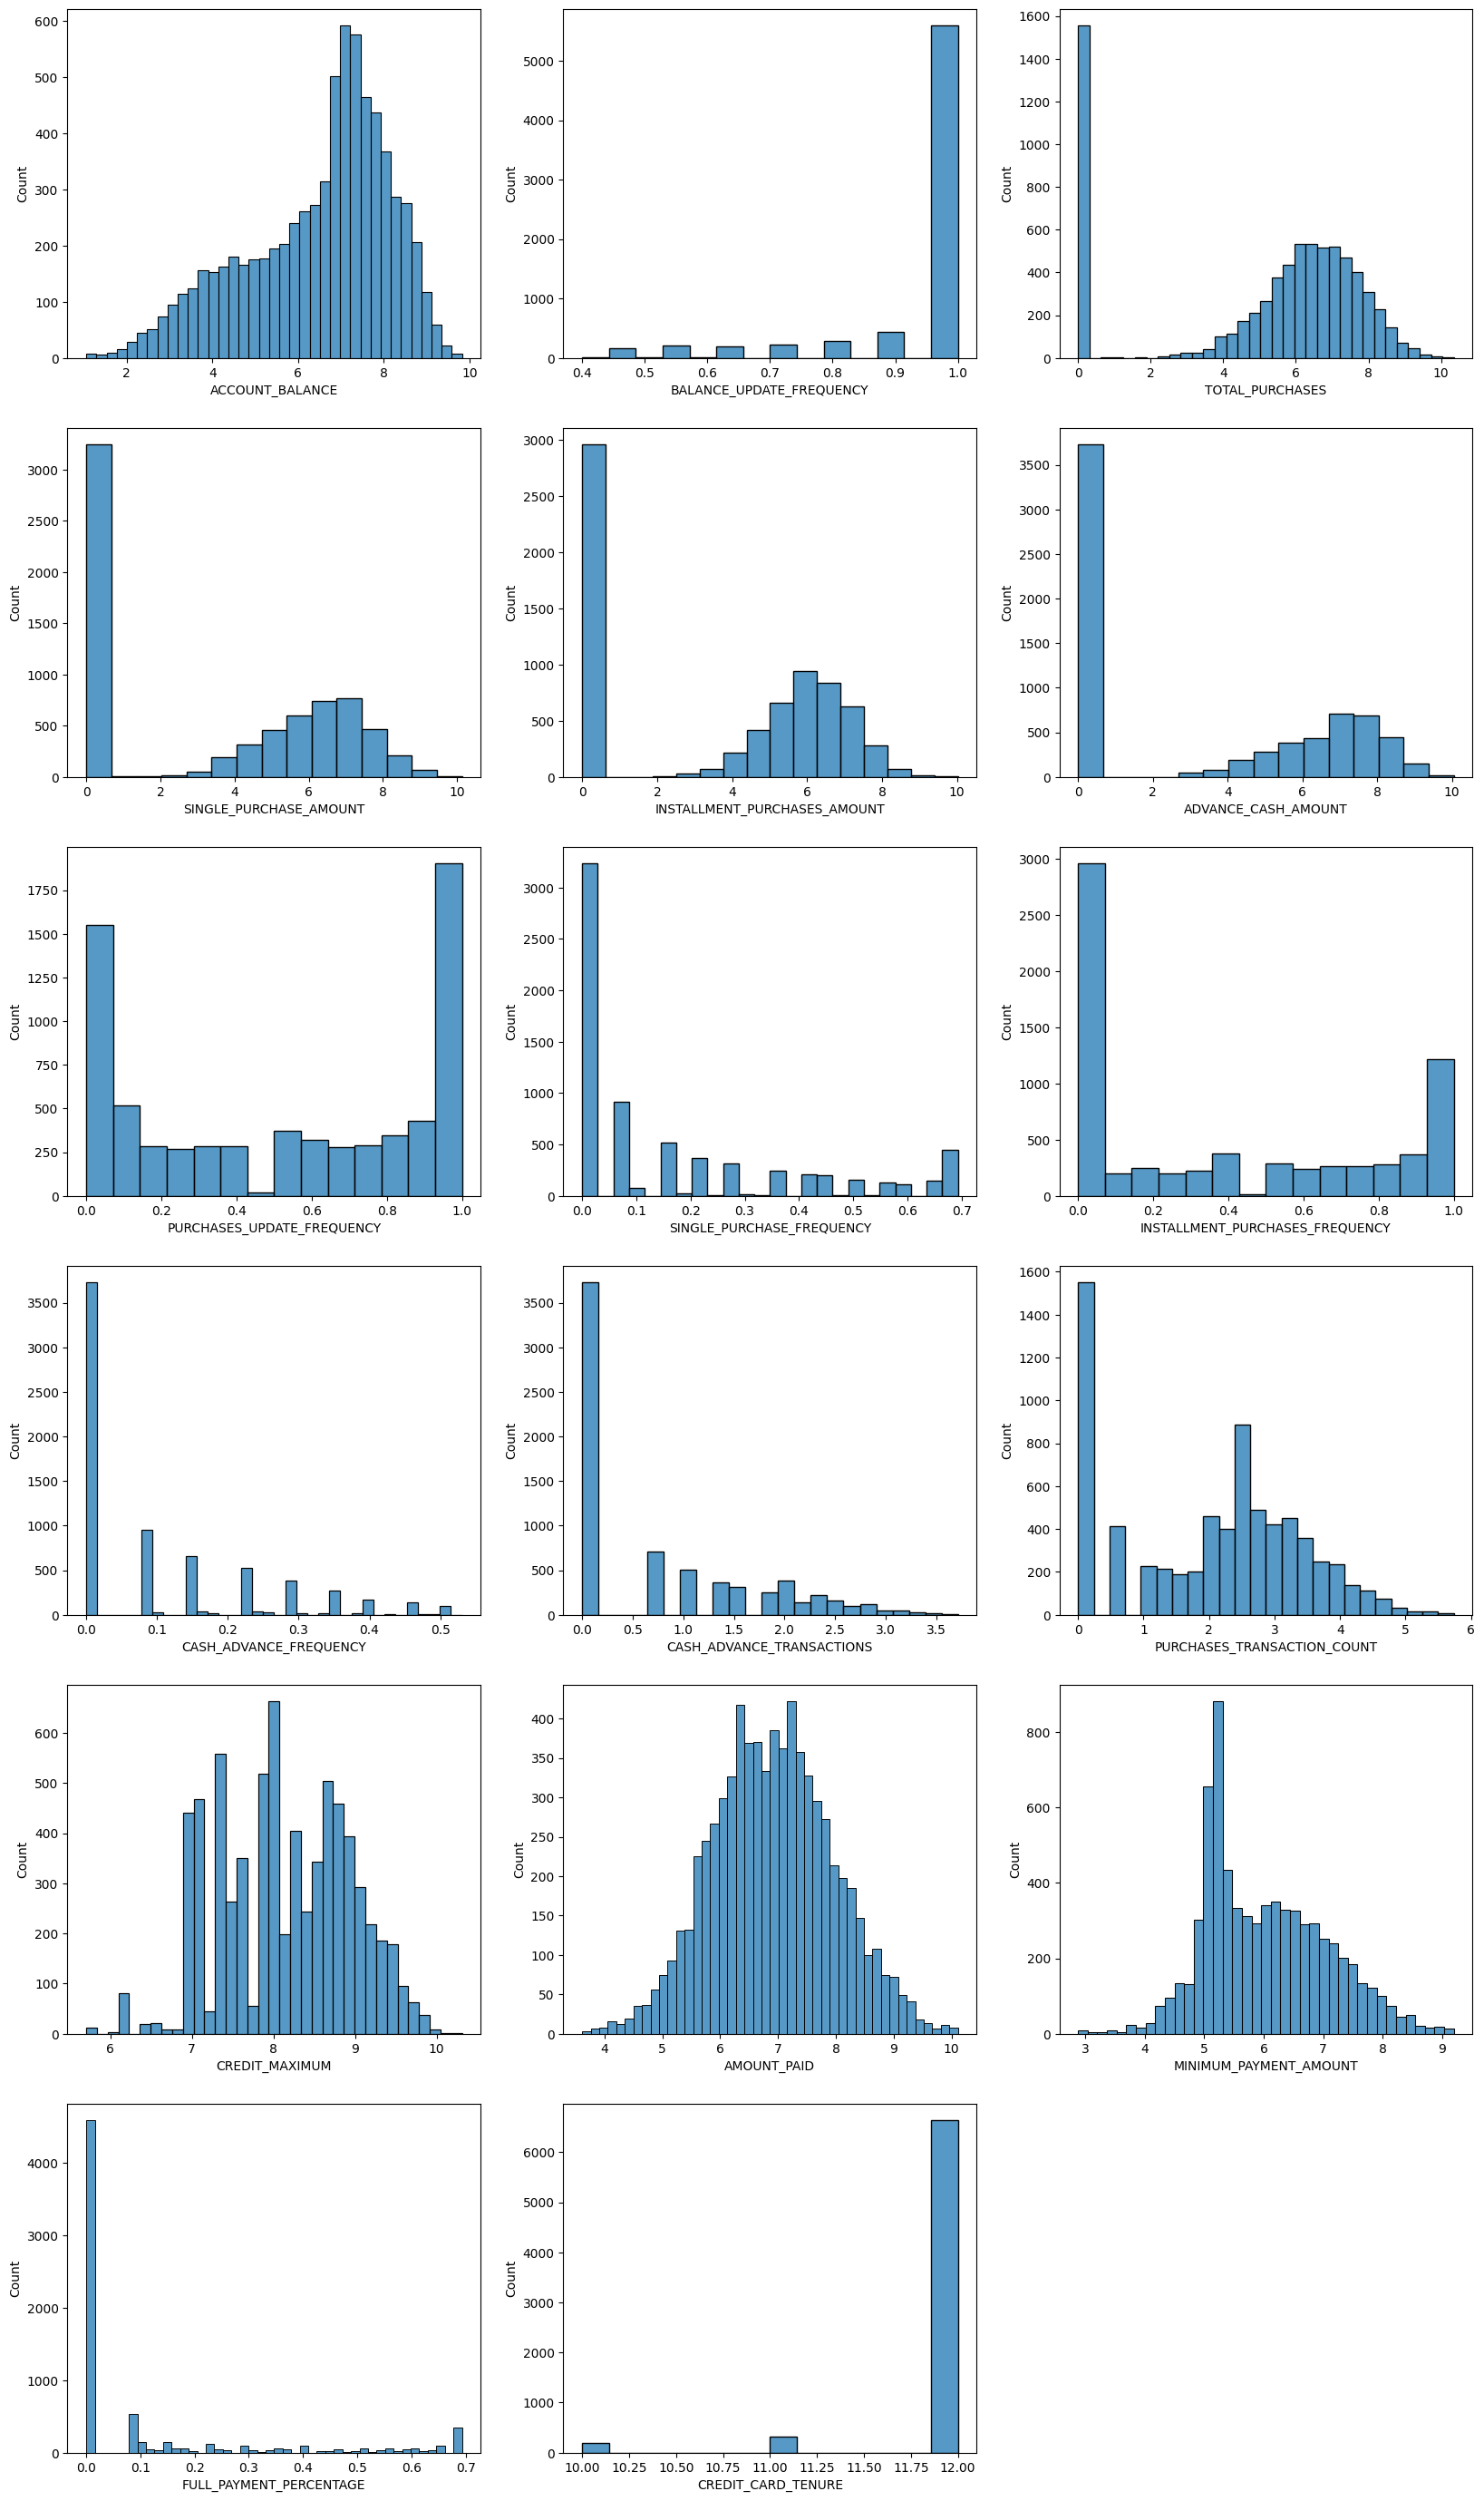

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot(df[col] , ax=ax)
        plt.xlabel(col)

plt.show()

##Clustering

###A

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

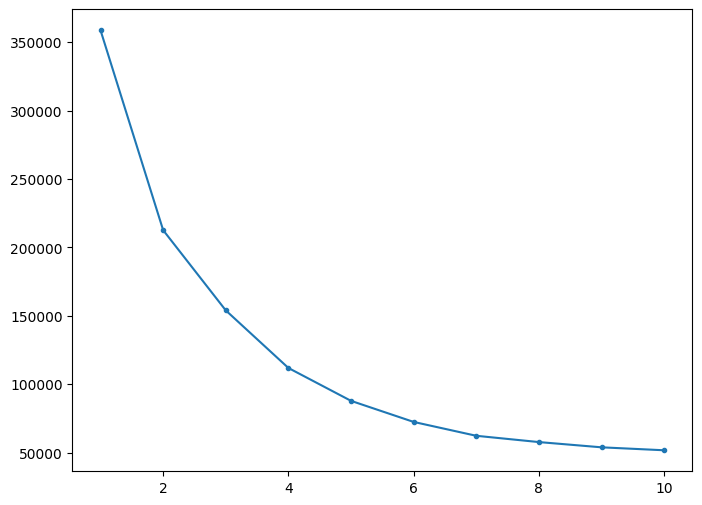

In [ ]:
kValues = range(1, 11)
inertiaValues = []

for k in kValues:
  kmeans = KMeans(n_clusters = k, random_state=42)
  kmeans.fit(df)
  inertiaValues.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(kValues, inertiaValues, marker= '.')
plt.show()

In [ ]:
# it's 3

###B

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

###C

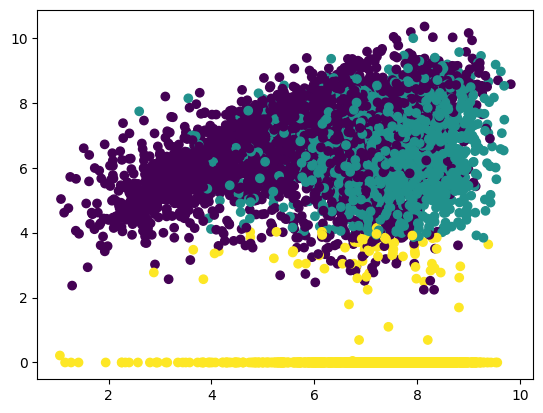

In [ ]:
plt.scatter(df['ACCOUNT_BALANCE'], df['TOTAL_PURCHASES'], c=kmeans.labels_)
plt.show()

####Dimention reduction

#####PCA

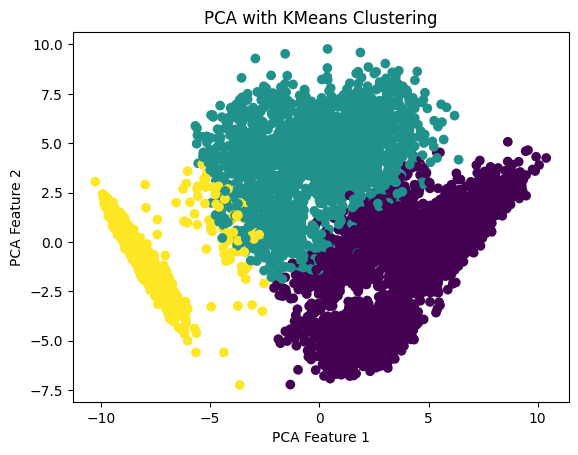

In [ ]:
from sklearn.decomposition import PCA
# PCA for dimensionality reduction
pca = PCA(n_components=2)
pcaVariables = pca.fit_transform(df)

# Plotting the clusters
plt.scatter(pcaVariables[:, 0], pcaVariables[:, 1], c=kmeans.labels_)
plt.title('PCA with KMeans Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()


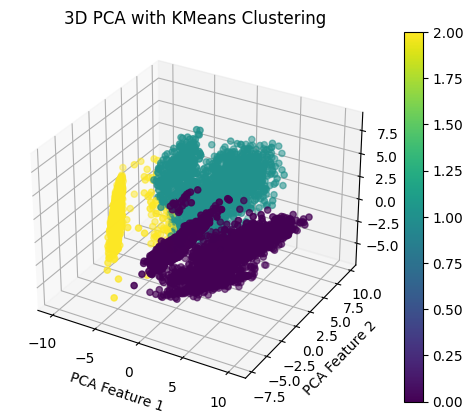

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# PCA for dimensionality reduction to 3 components
pca = PCA(n_components=3)
pcaVariables = pca.fit_transform(df)

# Plotting the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pcaVariables[:, 0], pcaVariables[:, 1], pcaVariables[:, 2], c=kmeans.labels_, cmap='viridis')

# Labeling the plot
ax.set_title('3D PCA with KMeans Clustering')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_zlabel('PCA Feature 3')

# Adding a color bar
plt.colorbar(sc)
plt.show()


#####t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, method='barnes_hut', random_state=42)
tsneVariables = tsne.fit_transform(df)

In [ ]:
tsneVariables

array([[ -8.4068  , -49.158714],
       [-67.731834,  14.75624 ],
       [ 11.204336,  16.285994],
       ...,
       [ 54.045174, -23.740412],
       [-72.84306 , -23.191587],
       [-55.440853,  12.214654]], dtype=float32)

In [ ]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

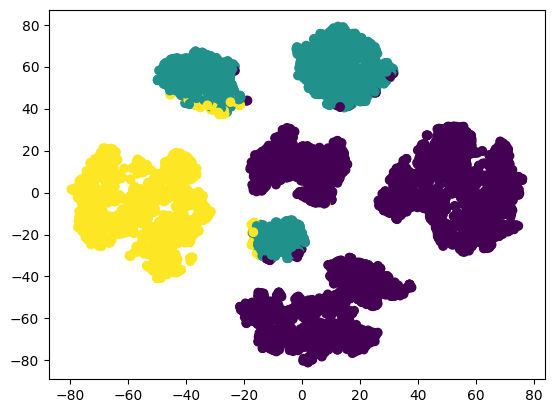

In [ ]:
plt.scatter(tsneVariables[:,0], tsneVariables[:,1], c=kmeans.labels_)
plt.show()

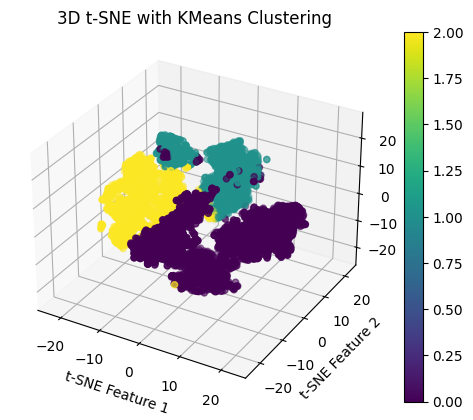

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# t-SNE for dimensionality reduction to 3 components
tsne = TSNE(n_components=3, random_state=42)
tsneVariables = tsne.fit_transform(df)

# Plotting the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(tsneVariables[:, 0], tsneVariables[:, 1], tsneVariables[:, 2], c=kmeans.labels_, cmap='viridis')

# Labeling the plot
ax.set_title('3D t-SNE with KMeans Clustering')
ax.set_xlabel('t-SNE Feature 1')
ax.set_ylabel('t-SNE Feature 2')
ax.set_zlabel('t-SNE Feature 3')

# Adding a color bar
plt.colorbar(sc)
plt.show()


###D

In [ ]:

# Calculate the means of each cluster
cluster_means = kmeans.cluster_centers_

# Create a DataFrame for better readability
cluster_means_df = pd.DataFrame(cluster_means, columns=df.columns)
cluster_means_df.index = [f'Cluster {i}' for i in range(len(cluster_means_df))]

print("Cluster Means:")
cluster_means_df

Cluster Means:


,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
Cluster 0,5.663049,0.922312,6.568066,4.094635,4.830693,0.040924,0.713032,0.222058,0.545175,0.000953,0.008264,2.670174,8.122065,6.760240,5.626214,0.193269,11.920648
Cluster 1,7.454126,0.970877,6.494974,5.037549,4.048130,6.887323,0.599575,0.231749,0.423091,0.220642,1.675249,2.497436,8.300989,7.324790,6.571844,0.047475,11.896492
Cluster 2,7.268544,0.949073,0.164247,0.116581,0.052101,6.711223,0.006546,0.003530,0.002595,0.214988,1.606688,0.045059,8.002080,6.809205,6.312194,0.026809,11.863858


###E

In [ ]:
# ok